<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

We can use the Law of Total probability,  
$P(R_5) = (P(5 | F) x P(F) + (P(5 | S) x P(S)) + (P(5 | T) x P(T))$
now, we can calculate each piece and put it together. 

P(5 | F) = 0, so the first term = 0
$P(5 | S) = \frac{1}{6}$  and $P(S) = \frac{10}{40} = \frac{1}{4}$
$P(5 | T) = \frac{1}{20}$  and $P(T) = \frac{2}{40} = \frac{1}{20}$

so the total prob. of rolling a five is:
$P(R_5) = 0 + \frac{1}{6} x \frac{1}{4} x \frac{1}{20} x \frac{1}{20} == 0.0441666$

In [2]:
print((1/24) + (1/400))

0.04416666666666667


**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 


Here we can use Bayes Rule, 


$P(A | B) = P\frac{P(B | A)P(A)}{P(B)}$

and we can apply the calculation we made in the last step. 
bayes rules says that 

$P(S | 5) = \frac{P(5 | S)P(S)}{P(5)}$
and we  calculated P(5) in the last step and we know $P(S) = \frac{1}{4}$ and $P(5 | S) = \frac{1}{6}$. 
and that $P(S | 5) = \frac{P(5 | S)P(S)}{P(5)}$ 

now
P(S | 5) = $\frac{(1/6)(1/4)}{(1/24 + 1/400)} == .94 = $94 percent

In [3]:
print( ((1/6)*(1/4)) / ((1/24) + (1/400)) )

0.9433962264150942


**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.


NO! if $R_5$ and $S$ are independent, then it would be the case that
$P(R_5 | S) = P(R_5)$ and that $P(S | R_5) = P(S)$
lets calculate these probabilities to justify my answer. 
we know from the past problem $P(S | 5)$= .94 and that $P(R_5 | S) = \frac{1}{6}$ since there 5 is just 1 out of 6 on an even die in this case, ($S$ = six sided die)
.94 is not equal to $\frac{1}{6}$ therefore my answer of NO has been validated by the definition of independence;
that is, they are not independent because their conditional probabilities with respect to each other are not equal to their independent probability. 



**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.


$P(F \mid E_1)$ = $\frac{P(E_1 \mid F)P(F)}{P(E_1)}$ which really just equals $\frac{P(F)}{P(E_1)}$ since $P(E_1 \mid F)$= 1
finally before we solve we can simplify to 
$\frac{\frac{7}{10}}{P(E_1)}$ = $\frac{7}{10P(E_1)}$

now all is left to do is calculate $E_1$ which is that you roll a 1,2,3,4 
now, lets calculate P(1) --> P(4) and then sum up these probabilities to get the total probabilitiy of E1
$P(1) = P(1 \mid F)P(F) + P(1 \mid S)P(S) + P(1 \mid  T)P(T)$
$P(2) = P(2 \mid F)P(F) + P(2 \mid S)P(S) + P(2 \mid  T)P(T)$
$P(3) = P(3 \mid F)P(F) + P(3 \mid S)P(S) + P(3 \mid  T)P(T)$
$P(4) = P(4 \mid F)P(F) + P(4 \mid S)P(S) + P(4 \mid  T)P(T)$
but these are all goign to be the same probability  because 1-4 are on all the dice, therefore we can just caluclate the first and multiply by 4. 

P(1) = $(\frac{1}{4})(\frac{7}{10})+(\frac{1}{6})(\frac{1}{4})+(\frac{1}{20})(\frac{1}{20})$ 
this simplifies to P(1) = $\frac{7}{40} + \frac{1}{24} + \frac{1}{400}$ = $\frac{263}{1200}$
now we can calculate: 
$P(E_1)$ = $P(1) x 4$ = $87.67$ percent chance of $E_1$. Now we can finally solve the problem, by just doing
$\frac{7}{10(.87)}$ = $\frac{7}{8.7}$ = $0.804$ SO, finally, $P(F \mid E_1)$ = $.804$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.


first lets simplify $P(F \mid E_n)$ = $\frac{P(E_n \mid F)P(F)}{P(E_n}$  and since $P(E_n \mid F)$==1 this can further by simplified to $\frac{P(F)}{P(E_n)}$, and again we know $P(F)$=$\frac{7}{10}$ so the expression can be further simplified to this term: $\frac{7}{10P(E_n)}$ now all that is left to do is to calculate $E_n$

$P(E_n)$ = $P(E_n \mid F)P(F) + P(E_n \mid S)P(S) + P(E_n \mid T)P(T)$ which is equal to
$P(F) + P(E_n \mid S)P(S) + P(E_n | T)P(T)$

$P(E_n)$ == $\frac{7}{10}$ + $\frac{1}{4}(\frac{4}{6})^n$ + $\frac{1}{20}(\frac{4}{20})^n$ so we can finally solve our problem which is $P(F \mid E_n$) == $\frac{7}{10P(E_n)}$ now equal to $\frac{7}{10(\frac{7}{10} + \frac{1}{4}(\frac{4}{6})^n + \frac{1}{20}(\frac{4}{20})^n)}$

In [13]:
def prob_four(n): #this code is equivalent to the fraction I laid out above to calculate P(F | E_n)
    PofEn = (7/10)+((1/4)*((4/6)**n))+((1/20)*((4/20)**n))
    return((7/10)*(1/PofEn))
print(prob_four(1))

0.7984790874524715


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [17]:
n = 1
while prob_four(n) < 0.955:
    n += 1
print("n: ", n, " probability that die is 4 sided after n rolls of 1,2,3, or 4 = ", prob_four(n))

n:  5  probability that die is 4 sided after n rolls of 1,2,3, or 4 =  0.9550605655503713


***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

$P(L)$ = P(L|G)P(G) + P(L|C)P(C) + P(L|R)P(R), rewritten as
$P(L)$ = $(\frac{1}{4})(\frac{1}{4})$ + $(\frac{1}{3})(\frac{1}{4})$ + 0($\frac{1}{4}$) this is equal to
$\frac{1}{16} + \frac{1}{12} + 0$ = $0.145833$


**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

$P(1st = G)=\frac{1}{2}$ because half of all routes leading away from R flow into G. So the Probability that we get to G on 1 hop is 1/2.  Now the probability that $P(2nd = G)=\frac{1}{8}$ because there are 8 ways that we could take two steps away from R and 1 of them lands on G. Now lets sum up the probabilities and note that there is no intersection between the two events so we can just say $P(1st=G \mid\mid 2nd=G)$ = $P(1st=G)$ + $P(2nd=G$) = $\frac{1}{2} + \frac{1}{8}$ which = $\frac{5}{8}$

that is, the probability that she reaches the reservsoir on her first or second step is $\frac{5}{8}$

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
$P$(O runs into S on 1 move) = $\frac{1}{3x3}=\frac{1}{9}$
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?
Stella has 11 possible moves and Oscar as 13 possible moves, Therefore if we look at each move as a triple with the start, middle and end nodes, (s, m, e) for each possible 2 step combination, we take the crossproduct of Oscrars 13 moves with Stellas 11 moves with a total of 143 possible move combinations represented as two triples $(S_o, M_o, E_o)(S_s, M_s, E_s)$
and we want to find all the sets like this such that $E_o == E_s$ . If we just loop through a double for loop and for each of stellas move add 1 to a counter if it matches up with one of oscars moves (2 steps for both) then we get the number of matches out of our total sample space. then we can just divide this number by our sample space size (int this case 143) to get our probability $P($Oscars Meets Stella on Move 2$)$ == $\frac{29}{143}$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [21]:
stellas_moves = [['h','g','r'],
                ['h','g','h'],
                ['h','g','e'],
                ['h','g','l'],
                ['h','l','h'],
                ['h','l','g'],
                ['h','l','c'],
                ['h','l','e'],
                ['h','c','l'],
                ['h','c','h'],
                ['h','c','e']]
oscars_moves = [['e','r','e'],
                ['e','r','g'],
                ['e','g','e'],
                ['e','g','l'],
                ['e','g','r'],
                ['e','g','h'],
                ['e','l','e'],
                ['e','l','h'],
                ['e','l','g'],
                ['e','l','c'],
                ['e','c','e'],
                ['e','c','l'],
                ['e','c','h']]

def probMeetIn2(stellas_moves, oscars_moves): #code uses a double for loop to look through the moves of each and find matches. 
    denominator = len(stellas_moves)*len(oscars_moves)
    numerator = 0
    for smove in stellas_moves:
        for omove in oscars_moves:
            if smove[2] == omove[2]:
                numerator += 1
                print(smove, omove, numerator)
    return numerator / denominator

print(probMeetIn2(stellas_moves, oscars_moves), " is the probability stella and oscar meet after 2 moves.")

['h', 'g', 'r'] ['e', 'g', 'r'] 1
['h', 'g', 'h'] ['e', 'g', 'h'] 2
['h', 'g', 'h'] ['e', 'l', 'h'] 3
['h', 'g', 'h'] ['e', 'c', 'h'] 4
['h', 'g', 'e'] ['e', 'r', 'e'] 5
['h', 'g', 'e'] ['e', 'g', 'e'] 6
['h', 'g', 'e'] ['e', 'l', 'e'] 7
['h', 'g', 'e'] ['e', 'c', 'e'] 8
['h', 'g', 'l'] ['e', 'g', 'l'] 9
['h', 'g', 'l'] ['e', 'c', 'l'] 10
['h', 'l', 'h'] ['e', 'g', 'h'] 11
['h', 'l', 'h'] ['e', 'l', 'h'] 12
['h', 'l', 'h'] ['e', 'c', 'h'] 13
['h', 'l', 'g'] ['e', 'r', 'g'] 14
['h', 'l', 'g'] ['e', 'l', 'g'] 15
['h', 'l', 'c'] ['e', 'l', 'c'] 16
['h', 'l', 'e'] ['e', 'r', 'e'] 17
['h', 'l', 'e'] ['e', 'g', 'e'] 18
['h', 'l', 'e'] ['e', 'l', 'e'] 19
['h', 'l', 'e'] ['e', 'c', 'e'] 20
['h', 'c', 'l'] ['e', 'g', 'l'] 21
['h', 'c', 'l'] ['e', 'c', 'l'] 22
['h', 'c', 'h'] ['e', 'g', 'h'] 23
['h', 'c', 'h'] ['e', 'l', 'h'] 24
['h', 'c', 'h'] ['e', 'c', 'h'] 25
['h', 'c', 'e'] ['e', 'r', 'e'] 26
['h', 'c', 'e'] ['e', 'g', 'e'] 27
['h', 'c', 'e'] ['e', 'l', 'e'] 28
['h', 'c', 'e'] ['e', 'c', 'e

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.
            
$\Omega$ = {{$H_t,M_d$},{$H_t,H_d,H_t,M_d$},{$H_t,H_d,M_t,H_d$},{$H_t,H_d,M_t,M_d$},{$H_t,H_d,H_t,H_d$}{$M_t,M_d,H_t,M_d$},{$M_t,M_d,H_t,H_d$},{$M_t,M_d,M_t,H_d$},{$M_t,H_d$}}

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.
this term -> $\frac{p(1-q)}{P(E)}$ is the probability that that tony will win given that it ends in the first round

**Part C**: Explain why events $C$ and $T$ are independent. 
$C$ and $T$ are the events that the fight continues past round 1 and tony wins respectively, the reason they are independent is that it doesn't matter what round we are on, since the strikes are independent, the chances of tony winning are always independent of the round. Mathematically this means that $P(C \mid T)$ = $P(C)$

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

by the law of total probability 
$P(T) = P(T \mid E)P(E) + P(T \mid C)P(C)$
we know that $P(T \mid E)P(E)=p(1-q)$
now to get $P(C)$ we need to add up the probability they both miss plus the probability they both hit. 
$P(C)$ = $(1-q)(1-p) + qp$ = $2qp - q - p + 1$

Therefore $P(T)$ = $p(1-q) + (2qp - p -q + 1)P(T \mid C)$

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 
well,

we can start by re-writing as  $P(T)$ = $p(1-q) + (2qp - p -q + 1)P(T)$

now we can subtract P(T) from both sides. 

 $0$ = $p(1-q) + (2qp - p -q)P(T)$
 
 now multiply by negative 1 on both sides
 
  $0$ = -$p(1-q) - (2qp - p -q)P(T)$
  
  $(2qp -p -q)P(T) = p(1-q)$
  
  finally we get
  
  $P(T)$ = $\frac{-p(1-q)}{2qp-p-q}$   == the probability that tony will win overall

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

because the tony winning is independent of how he wins. 

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

1. simplify P(T ∣ E)P(E)=p(1−q) since T and E are independent, --> just equals p(1-q)
2. now to get P(C), the sum of P(both miss) + P(both hit) = pq + (1-p)(1-q)
3. but together into formula for law of total probability then simplify

we went this root so that we could get the probability of Tony winning in terms of p and q, for both the case of it going past and staying in the first round. This helps to confirm the supposed independence of T, E. 

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [7]:
import random

def draw_card():
    arry1 = [-100,-50,50,100,250]
    r = random.randint(0, 5)
    return arry1[r]
went_to_jail_counter = 0
went_jail_and_lost = 0
def miniopoly_turn(location, cash):
    
    GameDictionary = {1:"GO", 0:"EMPTY", 2:"GOTOJAIL", 3:"DRAW", 10:"JAIL", -1:"OTHER" }
    GameBoard = [-1 for i in range(41)]
    GameBoard[2] = 3
    GameBoard[7] = 3
    GameBoard[17] = 3
    GameBoard[22] = 3
    GameBoard[33] = 3
    GameBoard[36] = 3
    GameBoard[0] = 1
    GameBoard[10] = 0
    GameBoard[20] = 0
    GameBoard[30] = 2 #go to jail
    GameBoard[40] = 10 #jail
    iswentJail = 0
    roll_die_one = random.randint(1,6)
    roll_die_two = random.randint(1,6)
    if cash < 0:
        if iswentJail == 1:
            went_jail_and_lost += 1
        return -1, -1
    if GameDictionary[GameBoard[location]] == "JAIL": #started in JAIL
        print("user in jail")
        iswentJail = 1
        went_to_jail_counter += 1
        if roll_die_one != roll_die_two:
            cash -= 20
        else: 
            location = (10 + roll_die_one + roll_die_two) % 40
        
        return location, cash
    else:
        prevLocation = location
        location = (location + roll_die_one + roll_die_two) % 40
        if GameDictionary[GameBoard[location]] == "GO":
            cash += 200
            return location, cash
        if prevLocation > location: #then we looped around
            cash += 200
        if GameDictionary[GameBoard[location] == "EMPTY"]:
            cash = cash -location
            return location, cash
        if GameDictionary[GameBoard[location] == "GOTOJAIL"]:
            print("go to jail")
            location = 40
            return location, cash
        if GameDictionary[GameBoard[location] == "DRAW"]:
            card = draw_card()
            if card > 0:
                print("you have been awarded card worth: ", card)
                cash += card
            else:
                print("you owe the bank: ", card)
                cash += card
        if GameDictionary[GameBoard[location] == "OTHER"]:
            cash = cash - location
            print("loosing cash")
            
            return location, cash
    return location, cash


location=1
cash = 200
for i in range(1000):
    location, cash = miniopoly_turn(location, cash)

if went_to_jail_counter != 0:
    print(went_jail_and_lost / went_to_jail_counter)

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

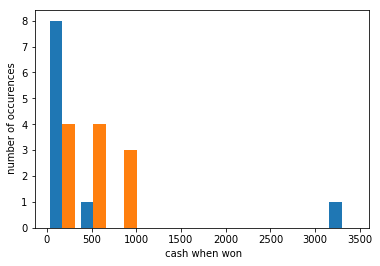

probability of win:  0.9996
turns lost:  2  and turns won:  4998


In [9]:
cash_array = []
turns_won = 0
turns_lost = 0
went_bankrupt = 0
for i in range(0, 5000):
    count1 = 0
    location = 1
    cash = 200
    while location != -1 and count1 <= 30:
        location, cash = miniopoly_turn(location, cash)
        count1 = count1 + 1
    #print("end of game: players cash is: ", cash)
    cash_array.append(cash)
    if cash < 200 or location < 0:
        turns_lost = turns_lost + 1
    else:
        turns_won  = turns_won + 1

cash_hist = np.histogram(cash_array)
plt.hist(cash_hist)
plt.xlabel(" cash when won")
plt.ylabel(" number of occurences")
plt.show()
print("probability of win: ", turns_won / (turns_won + turns_lost))
print("turns lost: ", turns_lost, " and turns won: ", turns_won)

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

$ESTIMATE$ = 0.0008 = .08 percent

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

$ESTIMATE$ = 0.01


NameError: name 'went_to_jail_counter' is not defined

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

P(J | B) = 0, given my code, because none went to jail and only a few went bankrupt.

***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 

**unfortunately I ran out of time to do P5**


**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)